In [156]:
import pandas as pd
import requests

# FRED API Key (you need to sign up for a free API key at https://fred.stlouisfed.org/docs/api/api_key.html)
api_key = "215d13c14750f2200a0ce22d18e0d058"

# FRED API endpoint
base_url = "https://api.stlouisfed.org/fred/series/observations"

# Define the series IDs for the data you want to collect
series_ids = {
    "interest_rate": "DFF",  # Federal Funds Rate (interest rate)
    "unemployment_rate": "UNRATE",  # Unemployment Rate
    "gdp": "GDP",  # Gross Domestic Product
}

# Function to fetch data from FRED
def fetch_fred_data(series_id, api_key):
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": "2005-01-01",  # Start date
        "observation_end": "2024-01-31",  # End date
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data["observations"])
        df["value"] = pd.to_numeric(df["value"], errors="coerce")
        df["date"] = pd.to_datetime(df["date"])
        return df[["date", "value"]].rename(columns={"value": series_id})
    else:
        print(f"Failed to fetch data for {series_id}: {response.status_code}")
        return None

# Fetch and merge all economic data
economic_data = None
for series_id in series_ids.values():
    data = fetch_fred_data(series_id, api_key)
    if economic_data is None:
        economic_data = data
    else:
        economic_data = pd.merge(economic_data, data, on="date", how="outer")

# Save the data to a CSV file
economic_data.to_csv("economic_data.csv", index=False)
print("Economic data saved to economic_data.csv")

Economic data saved to economic_data.csv


In [161]:
economic_data = pd.read_csv(r'economic_data.csv')
economic_data

,date,DFF,UNRATE,GDP
0,2005-01-01,1.97,5.3,12767.286
1,2005-01-02,1.97,NaN,NaN
2,2005-01-03,2.31,NaN,NaN
3,2005-01-04,2.25,NaN,NaN
4,2005-01-05,2.25,NaN,NaN
...,...,...,...,...
6965,2024-01-27,5.33,NaN,NaN
6966,2024-01-28,5.33,NaN,NaN
6967,2024-01-29,5.33,NaN,NaN
6968,2024-01-30,5.33,NaN,NaN


In [119]:
import requests
import pandas as pd

# BLS API endpoint
bls_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# BLS API key (sign up at https://data.bls.gov/registrationEngine/)
api_key = "9e9108fff33b42c0b1fc2d769e8567f2"

# Define the series ID for employment data
series_id = "LNS14000000"  # Unemployment Rate

# Request parameters
params = {
    "seriesid": [series_id],
    "startyear": "2005",
    "endyear": "2025",
    "registrationkey": api_key,
}

# Send a POST request to the BLS API
response = requests.post(bls_url, json=params)
data = response.json()

# Check if the request succeeded
if data.get("status") == "REQUEST_SUCCEEDED":
    # Extract the series data
    series_data = data["Results"]["series"]
    
    # Process the data
    employment_data = []
    for series in series_data:
        for entry in series["data"]:
            year = entry["year"]
            period = entry["period"]
            value = entry["value"]
            employment_data.append({
                "date": f"{year}-{period[1:]}",  # Convert period (e.g., "M09") to "YYYY-MM"
                "unemployment_rate": float(value)  # Convert value to float
            })
    
    # Convert to DataFrame
    employment_df = pd.DataFrame(employment_data)
    employment_df["date"] = pd.to_datetime(employment_df["date"])
    employment_df.to_csv("employment_data.csv", index=False)
    print("Employment data saved to employment_data.csv")
else:
    print(f"Failed to fetch employment data: {data.get('message', 'Unknown error')}")

Employment data saved to employment_data.csv


In [120]:
emp_data= pd.read_csv(r'employment_data.csv')
emp_data

,date,unemployment_rate
0,2024-12-01,4.1
1,2024-11-01,4.2
2,2024-10-01,4.1
3,2024-09-01,4.1
4,2024-08-01,4.2
...,...,...
235,2005-05-01,5.1
236,2005-04-01,5.2
237,2005-03-01,5.2
238,2005-02-01,5.4


In [126]:
import pandas as pd
import requests
import zipfile
import io

# URL for the ZIP file containing mortgage lending rate data
zip_url = "https://www150.statcan.gc.ca/n1/tbl/csv/34100145-eng.zip"

# Download the ZIP file
response = requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract specific data file (ignoring metadata)
        data_filename = "34100145.csv"
        with z.open(data_filename) as f:
            df = pd.read_csv(f)

        # Convert 'REF_DATE' to datetime format
        df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

        # Filter data: Keep only last 5 years (from 2019-01 onwards)
        df = df[df["REF_DATE"] >= "2005-01-01"]

        # Save filtered data to CSV
        df.to_csv("conventional_mortgage_rates_las5years.csv", index=False)
        print("✅ Data saved as 'conventional_mortgage_rates_last5years.csv'")

else:
    print(f"❌ Failed to download data. HTTP Status Code: {response.status_code}")



✅ Data saved as 'conventional_mortgage_rates_last5years.csv'


In [127]:
mort_data = pd.read_csv(r'conventional_mortgage_rates_last5years.csv')
mort_data

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2005-01-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.60,NaN,NaN,NaN,2
1,2005-02-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.59,NaN,NaN,NaN,2
2,2005-03-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.60,NaN,NaN,NaN,2
3,2005-04-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.67,NaN,NaN,NaN,2
4,2005-05-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.55,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.73,NaN,NaN,NaN,2
236,2024-09-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.55,NaN,NaN,NaN,2
237,2024-10-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.44,NaN,NaN,NaN,2
238,2024-11-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,5.38,NaN,NaN,NaN,2


In [128]:
# URL for the ZIP file containing the New Housing Price Index (NHPI) data
zip_url = "https://www150.statcan.gc.ca/n1/tbl/csv/18100205-eng.zip"

# Download the ZIP file
response = requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract specific data file (ignoring metadata)
        data_filename = "18100205.csv"
        with z.open(data_filename) as f:
            df = pd.read_csv(f)

        # Convert 'REF_DATE' to datetime format
        df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

        # Filter data: Keep only last 5 years (from 2019-01 onwards)
        df = df[df["REF_DATE"] >= "2005-01-01"]
        # Keep only rows where 'GEO' is 'Canada'
        df = df[df["GEO"] == "Canada"]

        # Save filtered data to CSV
        df.to_csv("new_housing_price_index_last5years.csv", index=False)
        print("✅ Data saved as 'new_housing_price_index_last5years.csv'")

else:
    print(f"❌ Failed to download data. HTTP Status Code: {response.status_code}")

✅ Data saved as 'new_housing_price_index_last5years.csv'


In [129]:
house_data = pd.read_csv(r'new_housing_price_index_last5years.csv')
house_data.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2005-01-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,70.1,NaN,NaN,NaN,1
1,2005-01-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,69.1,NaN,NaN,NaN,1
2,2005-01-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,73.0,E,NaN,NaN,1
3,2005-02-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,70.3,NaN,NaN,NaN,1
4,2005-02-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,69.3,NaN,NaN,NaN,1


In [139]:
import pandas as pd
import requests
import zipfile
import io

# URL for the ZIP file containing CPI data from Statistics Canada
zip_url = "https://www150.statcan.gc.ca/n1/tbl/csv/18100004-eng.zip"

# Download the ZIP file
response = requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract specific data file (ignoring metadata)
        data_filename = "18100004.csv"
        with z.open(data_filename) as f:
            df = pd.read_csv(f, low_memory=False)

        # Convert 'REF_DATE' to datetime format
        df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

        # Filter data: Keep only last 5 years (from 2019-01 onwards)
        df = df[df["REF_DATE"] >= "2005-01-01"]

        # Keep only rows where 'GEO' is 'Canada'
        df = df[df["GEO"] == "Canada"]

        # Save filtered data to CSV
        df.to_csv("consumer_price_index_canada_last5years.csv", index=False)
        print("✅ Data saved as 'consumer_price_index_canada_last5years.csv'")

else:
    print(f"❌ Failed to download data. HTTP Status Code: {response.status_code}")


✅ Data saved as 'consumer_price_index_canada_last5years.csv'


In [142]:
pic_data = pd.read_csv(r'consumer_price_index_canada_last5years.csv')
pic_data

C:\Users\sumit\AppData\Local\Temp\ipykernel_28396\1290332999.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  pic_data = pd.read_csv(r'consumer_price_index_canada_last5years.csv')


,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2005-01-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.200,105.3,NaN,NaN,NaN,1
1,2005-01-01,Canada,2016A000011124,Food,2002=100,17,units,0,v41690974,2.300,105.4,NaN,NaN,NaN,1
2,2005-01-01,Canada,2016A000011124,Food purchased from stores,2002=100,17,units,0,v41690975,2.400,104.8,NaN,NaN,NaN,1
3,2005-01-01,Canada,2016A000011124,Meat,2002=100,17,units,0,v41690976,2.500,108.2,NaN,NaN,NaN,1
4,2005-01-01,Canada,2016A000011124,Fresh or frozen meat (excluding poultry),2002=100,17,units,0,v41690977,2.600,107.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73008,2024-12-01,Canada,2016A000011124,Semi-durable goods,2002=100,17,units,0,v41691224,2.276,100.2,NaN,NaN,NaN,1
73009,2024-12-01,Canada,2016A000011124,Non-durable goods,2002=100,17,units,0,v41691225,2.277,181.4,NaN,NaN,NaN,1
73010,2024-12-01,Canada,2016A000011124,Goods excluding food purchased from stores and...,2002=100,17,units,0,v41691229,2.281,114.9,NaN,NaN,NaN,1
73011,2024-12-01,Canada,2016A000011124,Services,2002=100,17,units,0,v41691230,2.282,179.2,NaN,NaN,NaN,1


In [185]:
import pandas as pd

# Load datasets
employment_df = pd.read_csv("employment_data.csv")
economic_df = pd.read_csv("economic_data.csv")
#mortgage_rates_df = pd.read_csv("mortgage_rates.csv")
conventional_mortgage_df = pd.read_csv("conventional_mortgage_rates_last5years.csv")
housing_price_index_df = pd.read_csv("new_housing_price_index_last5years.csv")
cpi_df = pd.read_csv("consumer_price_index_canada_last5years.csv")

# Convert all 'REF_DATE' columns to datetime format
datasets = [employment_df, economic_df, 
            conventional_mortgage_df, housing_price_index_df, cpi_df]

for df in datasets:
    df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

# Merge all datasets on 'REF_DATE'
merged_df = employment_df.merge(economic_df, on="REF_DATE", how="outer")
#merged_df = merged_df.merge(mortgage_rates_df, on="REF_DATE", how="outer")
merged_df = merged_df.merge(conventional_mortgage_df, on="REF_DATE", how="outer")
merged_df = merged_df.merge(housing_price_index_df, on="REF_DATE", how="outer")
merged_df = merged_df.merge(cpi_df, on="REF_DATE", how="outer")

# Sort by date
final_data = merged_df.sort_values(by="REF_DATE")

# Save merged data
final_data.to_csv("merged_mortgage_dataset.csv", index=False)

print("✅ Merged dataset saved as 'merged_mortgage_dataset.csv'")
final_data


C:\Users\sumit\AppData\Local\Temp\ipykernel_28396\3375007271.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cpi_df = pd.read_csv("consumer_price_index_canada_last5years.csv")


✅ Merged dataset saved as 'merged_mortgage_dataset.csv'


,REF_DATE,unemployment_rate,DFF,UNRATE,GDP,GEO_x,DGUID_x,UOM_x,UOM_ID_x,SCALAR_FACTOR_x,...,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
218301,2005-01-01,5.3,1.97,5.3,12767.286,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41691066,2.950,141.0,NaN,NaN,NaN,1.0
218501,2005-01-01,5.3,1.97,5.3,12767.286,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41690989,2.180,101.6,NaN,NaN,NaN,1.0
218500,2005-01-01,5.3,1.97,5.3,12767.286,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41690988,2.170,99.9,NaN,NaN,NaN,1.0
218499,2005-01-01,5.3,1.97,5.3,12767.286,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41690987,2.160,98.6,NaN,NaN,NaN,1.0
218498,2005-01-01,5.3,1.97,5.3,12767.286,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41690986,2.150,106.1,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,2024-12-01,4.1,NaN,NaN,NaN,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41691223,2.275,102.8,NaN,NaN,NaN,1.0
637,2024-12-01,4.1,NaN,NaN,NaN,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41691222,2.274,142.9,NaN,NaN,NaN,1.0
636,2024-12-01,4.1,NaN,NaN,NaN,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41691239,2.288,199.0,NaN,NaN,NaN,1.0
604,2024-12-01,4.1,NaN,NaN,NaN,Canada,2016A000011124,Percent,239.0,units,...,17.0,units,0.0,v41691198,2.248,187.6,NaN,NaN,NaN,1.0


In [186]:
final_data.isnull().sum()

REF_DATE                            0
unemployment_rate                6741
DFF                             10536
UNRATE                          17277
GDP                            155637
GEO_x                            6741
DGUID_x                          6741
UOM_x                            6741
UOM_ID_x                         6741
SCALAR_FACTOR_x                  6741
SCALAR_ID_x                      6741
VECTOR_x                         6741
COORDINATE_x                     6741
VALUE_x                          6741
STATUS_x                       225780
SYMBOL_x                       225780
TERMINATED_x                   225780
DECIMALS_x                       6741
GEO_y                            6741
DGUID_y                          6741
New housing price indexes        6741
UOM_y                            6741
UOM_ID_y                         6741
SCALAR_FACTOR_y                  6741
SCALAR_ID_y                      6741
VECTOR_y                         6741
COORDINATE_y

In [ ]:
#clean data set

final_data = final_data[['REF_DATE','unemployment_rate','DFF','UNRATE','GDP','VALUE']]

In [190]:
final_data.to_csv("final_data.csv", index=False)
print("✅ Data saved as 'final_data.csv'")

✅ Data saved as 'final_data.csv'


In [195]:
final_data = final_data.drop('UNRATE',axis=1)

In [213]:
final_data.isnull().sum()

REF_DATE             0
unemployment_rate    0
DFF                  0
GDP                  0
VALUE                0
dtype: int64

In [212]:
#Fill missing values
final_data["GDP"] = final_data["GDP"].fillna(method="ffill")
final_data['unemployment_rate'] = final_data['unemployment_rate'].fillna(method='ffill')
final_data["VALUE"] = final_data["VALUE"].fillna(df["VALUE"].rolling(3, min_periods=1).mean())
# If any missing values remain, use rolling average (3-month mean)
final_data["DFF"].fillna(final_data["DFF"].mean(), inplace=True)
final_data = final_data.dropna(subset = ['VALUE'])

In [235]:
final_data

,REF_DATE,unemployment_rate,DFF,GDP,VALUE
218301,2005-01-01,5.3,1.970000,12767.286,141.0
218501,2005-01-01,5.3,1.970000,12767.286,101.6
218500,2005-01-01,5.3,1.970000,12767.286,99.9
218499,2005-01-01,5.3,1.970000,12767.286,98.6
218498,2005-01-01,5.3,1.970000,12767.286,106.1
...,...,...,...,...,...
638,2024-12-01,4.1,1.463425,28624.069,102.8
637,2024-12-01,4.1,1.463425,28624.069,142.9
636,2024-12-01,4.1,1.463425,28624.069,199.0
604,2024-12-01,4.1,1.463425,28624.069,187.6


In [236]:
final_data.to_csv('final_data.csv',index = False)

In [223]:
# Check correlation between DFF and mortgage rates (VALUE)
correlation = final_data[["DFF", "VALUE_pct_change"]].corr()
print("Correlation between DFF and Mortgage Rates:\n", correlation)


Correlation between DFF and Mortgage Rates:
                        DFF  VALUE_pct_change
DFF               1.000000         -0.005224
VALUE_pct_change -0.005224          1.000000


In [243]:
import pandas as pd
import requests
import zipfile
import io

# URL for the ZIP file containing mortgage rate data from Statistics Canada
zip_url = "https://www150.statcan.gc.ca/n1/tbl/csv/34100145-eng.zip"

# Download the ZIP file
response = requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract the main data file
        data_filename = "34100145.csv"
        with z.open(data_filename) as f:
            df_mortgage = pd.read_csv(f)

        # Convert REF_DATE to datetime format
        df_mortgage["REF_DATE"] = pd.to_datetime(df_mortgage["REF_DATE"])

        # Filter data from 2005 to today
        df_mortgage = df_mortgage[df_mortgage["REF_DATE"] >= "2005-01-01"]

        # Keep only "Canada" data if GEO column exists
        if "GEO" in df_mortgage.columns:
            df_mortgage = df_mortgage[df_mortgage["GEO"] == "Canada"]

        # Select relevant columns
        df_mortgage = df_mortgage[["REF_DATE", "VALUE"]]
        df_mortgage.rename(columns={"VALUE": "Mortgage Rate"}, inplace=True)

        # Save filtered mortgage rate data
        df_mortgage.to_csv("mortgage_rates_2005_present.csv", index=False)
        print("✅ Filtered mortgage rate data (2005 to present) saved as 'mortgage_rates_2005_present.csv'")

else:
    print(f"❌ Failed to download data. HTTP Status Code: {response.status_code}")


✅ Filtered mortgage rate data (2005 to present) saved as 'mortgage_rates_2005_present.csv'


In [244]:
df = pd.read_csv('mortgage_rates_2005_present.csv')

In [245]:
df.head()

,REF_DATE,Mortgage Rate
0,2005-01-01,5.60
1,2005-02-01,5.59
2,2005-03-01,5.60
3,2005-04-01,5.67
4,2005-05-01,5.55


In [250]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

In [252]:
final_data = final_data.merge(df, on = 'REF_DATE', how='left')

In [254]:
final_data.head()

,REF_DATE,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate
0,2005-01-01,5.3,1.97,12767.286,141.0,5.6
1,2005-01-01,5.3,1.97,12767.286,101.6,5.6
2,2005-01-01,5.3,1.97,12767.286,99.9,5.6
3,2005-01-01,5.3,1.97,12767.286,98.6,5.6
4,2005-01-01,5.3,1.97,12767.286,106.1,5.6


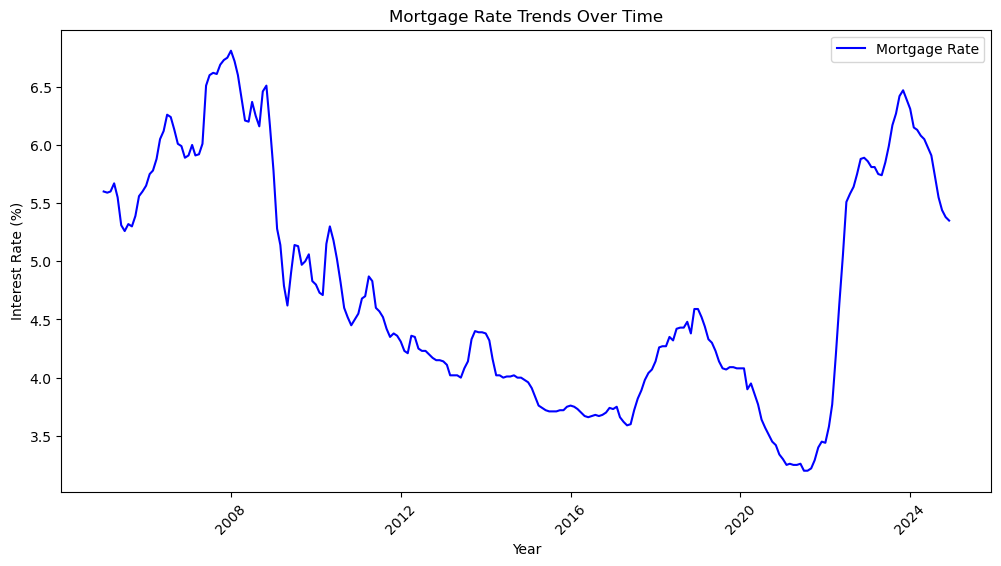

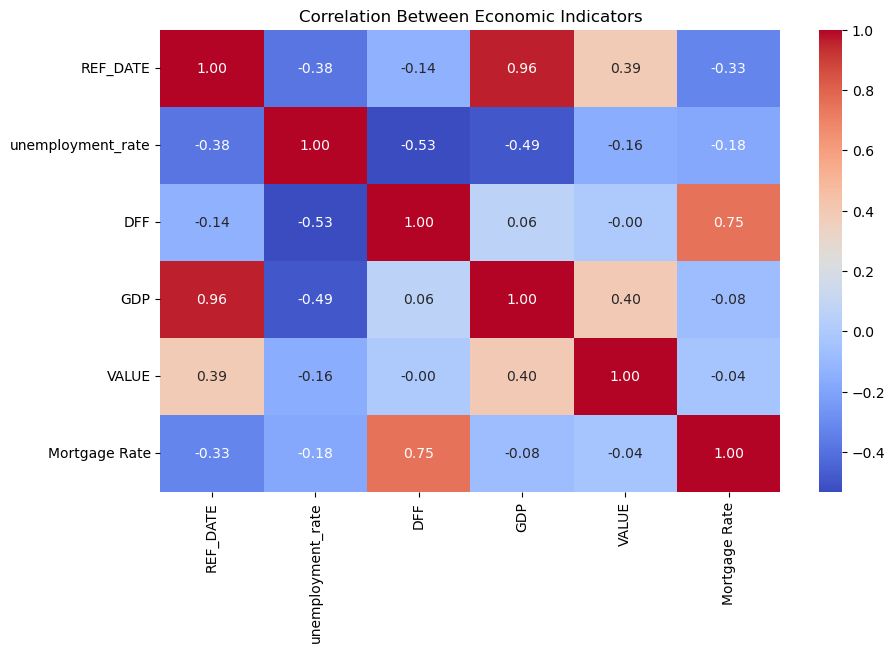

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Mortgage Rate Over Time
plt.figure(figsize=(12, 6))
plt.plot(final_data["REF_DATE"], final_data["Mortgage Rate"], label="Mortgage Rate", color="blue")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.title("Mortgage Rate Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(final_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Economic Indicators")
plt.show()


In [291]:
df = pd.read_csv('household_debt_data.csv')

In [292]:
df

,Custom table,Dataflow,Dataflow name,Timespan,Last update of data,Downloaded at,Source,Source URL,Download URL,About Debt service ratios
0,NaN,"BIS,WS_DSR,1.0",BIS debt service ratio,2005-03-31 - 2024-06-30,2024-12-10,2025-02-01 18:44 CET,BIS,https://data.bis.org/topics/DSR/data?filter=BO...,https://data.bis.org/topics/DSR/data?filter=BO...,https://data.bis.org/topics/DSR
1,Period,value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-30,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-31,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-12-31,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,2005-12-31,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2005-09-30,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2005-06-30,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2005-03-31,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
df = df[['Custom table', 'Dataflow']]

In [294]:
df

,Custom table,Dataflow
0,NaN,"BIS,WS_DSR,1.0"
1,Period,value
2,2024-06-30,14.6
3,2024-03-31,14.4
4,2023-12-31,14.4
...,...,...
76,2005-12-31,11.6
77,2005-09-30,11.6
78,2005-06-30,11.4
79,2005-03-31,11.2


In [296]:
df = df.drop(index = [0,1])

In [297]:
df = df.rename(columns = {'Custom table':'REF_DATE'})

In [298]:
df['Dataflow'] = df['Dataflow'].astype(float)

In [302]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 2 to 79
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   REF_DATE  78 non-null     datetime64[ns]
 1   Dataflow  78 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [305]:
df

,REF_DATE,Dataflow
2,2024-06-30,14.6
3,2024-03-31,14.4
4,2023-12-31,14.4
5,2023-09-30,14.5
6,2023-06-30,14.4
...,...,...
75,2006-03-31,11.9
76,2005-12-31,11.6
77,2005-09-30,11.6
78,2005-06-30,11.4


In [309]:
# Align household debt data to the first day of the month
df["REF_DATE"] = df["REF_DATE"].dt.to_period("M").dt.to_timestamp()

# Ensure final_data also has a monthly timestamp for consistency
final_data["REF_DATE"] = final_data["REF_DATE"].dt.to_period("M").dt.to_timestamp()

In [313]:
df

,REF_DATE,Dataflow
2,2024-06-01,14.6
3,2024-03-01,14.4
4,2023-12-01,14.4
5,2023-09-01,14.5
6,2023-06-01,14.4
...,...,...
75,2006-03-01,11.9
76,2005-12-01,11.6
77,2005-09-01,11.6
78,2005-06-01,11.4


In [314]:
final_data = final_data.merge(df, on= 'REF_DATE', how = 'left')

In [322]:
final_data

,REF_DATE,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow_x,Dataflow_y,Dataflow
0,2005-01-01,5.3,1.970000,12767.286,141.0,5.60,NaN,NaN,NaN
1,2005-01-01,5.3,1.970000,12767.286,101.6,5.60,NaN,NaN,NaN
2,2005-01-01,5.3,1.970000,12767.286,99.9,5.60,NaN,NaN,NaN
3,2005-01-01,5.3,1.970000,12767.286,98.6,5.60,NaN,NaN,NaN
4,2005-01-01,5.3,1.970000,12767.286,106.1,5.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
219034,2024-12-01,4.1,1.463425,28624.069,102.8,5.35,NaN,NaN,NaN
219035,2024-12-01,4.1,1.463425,28624.069,142.9,5.35,NaN,NaN,NaN
219036,2024-12-01,4.1,1.463425,28624.069,199.0,5.35,NaN,NaN,NaN
219037,2024-12-01,4.1,1.463425,28624.069,187.6,5.35,NaN,NaN,NaN


In [326]:
final_data.drop(final_data[['Dataflow_x','Dataflow_y']],axis=1,inplace= True)

In [336]:
final_data

,REF_DATE,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow
0,2005-01-01,5.3,1.970000,12767.286,141.0,5.60,11.0
1,2005-01-01,5.3,1.970000,12767.286,101.6,5.60,NaN
2,2005-01-01,5.3,1.970000,12767.286,99.9,5.60,NaN
3,2005-01-01,5.3,1.970000,12767.286,98.6,5.60,NaN
4,2005-01-01,5.3,1.970000,12767.286,106.1,5.60,NaN
...,...,...,...,...,...,...,...
219034,2024-12-01,4.1,1.463425,28624.069,102.8,5.35,NaN
219035,2024-12-01,4.1,1.463425,28624.069,142.9,5.35,NaN
219036,2024-12-01,4.1,1.463425,28624.069,199.0,5.35,NaN
219037,2024-12-01,4.1,1.463425,28624.069,187.6,5.35,NaN


In [26]:
final_data['Dataflow'] = final_data['Dataflow'].fillna(method = 'ffill')

C:\Users\sumit\AppData\Local\Temp\ipykernel_14200\12393955.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data['Dataflow'] = final_data['Dataflow'].fillna(method = 'ffill')


In [27]:
final_data.head()

,date,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow
0,2005-01-01,5.3,1.97,12767.286,141.0,5.6,11.0
1,2005-01-01,5.3,1.97,12767.286,101.6,5.6,11.0
2,2005-01-01,5.3,1.97,12767.286,99.9,5.6,11.0
3,2005-01-01,5.3,1.97,12767.286,98.6,5.6,11.0
4,2005-01-01,5.3,1.97,12767.286,106.1,5.6,11.0


In [352]:
import pandas as pd
import requests

# Define FRED API Key (Get it from https://fred.stlouisfed.org/)
API_KEY = "215d13c14750f2200a0ce22d18e0d058"  # Replace with your actual API Key

# Define the FRED Series ID for Mortgage Delinquency Rate
SERIES_ID = "DRSFRMACBS"  # Delinquency Rate on Single-Family Residential Mortgages

# Construct the API URL
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIES_ID}&api_key={API_KEY}&file_type=json"

# Fetch the data from FRED API
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df_delinquency = pd.DataFrame(data["observations"])

# Convert date column to datetime format
df_delinquency["date"] = pd.to_datetime(df_delinquency["date"])

# Rename columns for clarity
df_delinquency.rename(columns={"value": "Mortgage Delinquency Rate"}, inplace=True)

# Save the dataset
df_delinquency.to_csv("mortgage_delinquency_rate.csv", index=False)

print("✅ Mortgage delinquency rate data saved as 'mortgage_delinquency_rate.csv'")


✅ Mortgage delinquency rate data saved as 'mortgage_delinquency_rate.csv'


In [12]:
!pip install --upgrade --force-reinstall numpy pandas


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/66/a3/4139296b481ae7304a43581046b8f0a20da6a0dfe0ee47a044cade796603/numpy-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.2.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for python-dateutil>=2.8.2 from https://files.pythonhosted.org/packages/ec/57/56b9bcc3c9c6a792fcbaf139543cee77261f3651ca9da0c93f5c1221264b/python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/eb/38/ac33370d784287baa1c3d538978b5e2e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.2 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.2 which is incompatible.


In [2]:
import numpy as np
import pandas as pd

print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)


NumPy Version: 2.2.2
Pandas Version: 2.2.3


In [11]:
df = pd.read_csv('mortgage_delinquency_rate.csv')

In [12]:
df

,realtime_start,realtime_end,date,Mortgage Delinquency Rate
0,2025-01-31,2025-01-31,1991-01-01,3.09
1,2025-01-31,2025-01-31,1991-04-01,3.18
2,2025-01-31,2025-01-31,1991-07-01,3.22
3,2025-01-31,2025-01-31,1991-10-01,3.28
4,2025-01-31,2025-01-31,1992-01-01,3.12
...,...,...,...,...
130,2025-01-31,2025-01-31,2023-07-01,1.72
131,2025-01-31,2025-01-31,2023-10-01,1.70
132,2025-01-31,2025-01-31,2024-01-01,1.71
133,2025-01-31,2025-01-31,2024-04-01,1.73


In [13]:
df = df[['date','Mortgage Delinquency Rate']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       135 non-null    object 
 1   Mortgage Delinquency Rate  135 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [15]:
df.date = pd.to_datetime(df.date)

C:\Users\sumit\AppData\Local\Temp\ipykernel_14200\3331931521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)


In [16]:
#for give condition to datetime we use TimeStamp

df = df[(df['date']>= pd.Timestamp('2005-01-01'))&
       (df['date']<= pd.Timestamp('2024-12-31')) ]

In [17]:
df

,date,Mortgage Delinquency Rate
56,2005-01-01,1.42
57,2005-04-01,1.55
58,2005-07-01,1.59
59,2005-10-01,1.64
60,2006-01-01,1.61
...,...,...
130,2023-07-01,1.72
131,2023-10-01,1.70
132,2024-01-01,1.71
133,2024-04-01,1.73


In [24]:
final_data.rename(columns={'REF_DATE':'date'},inplace = True)

In [36]:
final_data.date = pd.to_datetime(final_data.date)

In [38]:
final_data = final_data.merge(df,on='date',how='left')

In [39]:
final_data

,date,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow,Mortgage Delinquency Rate
0,2005-01-01,5.3,1.970000,12767.286,141.0,5.60,11.0,1.42
1,2005-01-01,5.3,1.970000,12767.286,101.6,5.60,11.0,1.42
2,2005-01-01,5.3,1.970000,12767.286,99.9,5.60,11.0,1.42
3,2005-01-01,5.3,1.970000,12767.286,98.6,5.60,11.0,1.42
4,2005-01-01,5.3,1.970000,12767.286,106.1,5.60,11.0,1.42
...,...,...,...,...,...,...,...,...
219034,2024-12-01,4.1,1.463425,28624.069,102.8,5.35,14.6,NaN
219035,2024-12-01,4.1,1.463425,28624.069,142.9,5.35,14.6,NaN
219036,2024-12-01,4.1,1.463425,28624.069,199.0,5.35,14.6,NaN
219037,2024-12-01,4.1,1.463425,28624.069,187.6,5.35,14.6,NaN


In [42]:
final_data['Mortgage Delinquency Rate']=final_data['Mortgage Delinquency Rate'].fillna(method='ffill')

C:\Users\sumit\AppData\Local\Temp\ipykernel_14200\1663953668.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data['Mortgage Delinquency Rate']=final_data['Mortgage Delinquency Rate'].fillna(method='ffill')


In [46]:
final_data.tail()

,date,unemployment_rate,DFF,GDP,VALUE,Mortgage Rate,Dataflow,Mortgage Delinquency Rate
219034,2024-12-01,4.1,1.463425,28624.069,102.8,5.35,14.6,1.73
219035,2024-12-01,4.1,1.463425,28624.069,142.9,5.35,14.6,1.73
219036,2024-12-01,4.1,1.463425,28624.069,199.0,5.35,14.6,1.73
219037,2024-12-01,4.1,1.463425,28624.069,187.6,5.35,14.6,1.73
219038,2024-12-01,4.1,1.463425,28624.069,161.2,5.35,14.6,1.73


In [45]:
final_data.to_csv('final_data.csv')

In [47]:
df= pd.read_csv('household_debt_service_ratio.csv')

In [48]:
df.head()

,date,"Household debt service ratio, %"
0,1994-07-01,11.37
1,1994-10-01,11.46
2,1995-01-01,11.94
3,1995-04-01,11.88
4,1995-07-01,11.91


In [51]:
df.date = pd.to_datetime(df.date)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             121 non-null    datetime64[ns]
 1   Household debt service ratio, %  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [54]:
#for give condition to datetime we use TimeStamp

df = df[(df['date']>= pd.Timestamp('2005-01-01'))&
       (df['date']<= pd.Timestamp('2024-12-31')) ]

In [55]:
df.head()

,date,"Household debt service ratio, %"
42,2005-01-01,13.10
43,2005-04-01,13.15
44,2005-07-01,13.28
45,2005-10-01,13.49
46,2006-01-01,13.45


In [56]:
df.tail()

,date,"Household debt service ratio, %"
116,2023-07-01,15.09
117,2023-10-01,15.11
118,2024-01-01,15.06
119,2024-04-01,14.98
120,2024-07-01,14.72


In [57]:
final_data = final_data.merge(df,on='date',how='left')

In [61]:
final_data['Household debt service ratio, %'] = final_data['Household debt service ratio, %'].fillna(method = 'ffill')

C:\Users\sumit\AppData\Local\Temp\ipykernel_14200\2623180579.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data['Household debt service ratio, %'] = final_data['Household debt service ratio, %'].fillna(method = 'ffill')


In [66]:
final_data.rename(columns= {'Household debt service ratio, %':'DSR'},inplace = True)

In [68]:
final_data.to_csv('final_data.csv')